In [34]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 653 μs (started: 2024-08-24 14:17:04 +07:00)


theta =  [ 7. 15. -6.]
y predict =  [13.]
data =  [(0, 1), (2, 1), (3, 4)]


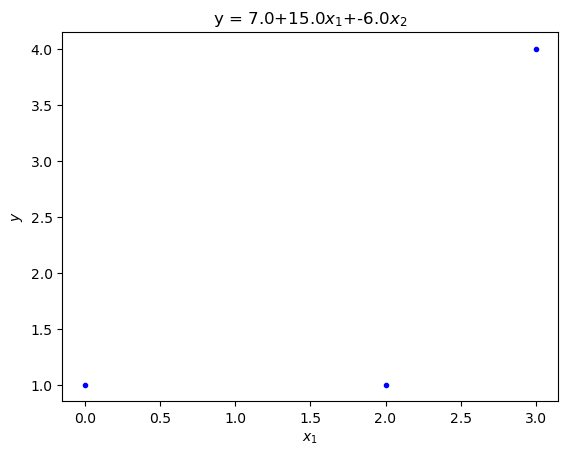

time: 78.1 ms (started: 2024-08-24 14:17:04 +07:00)


In [35]:
import numpy as np
np.set_printoptions(precision=2)
from sklearn.datasets import make_regression

#x, y = make_regression(n_samples=10, n_features=2, noise=2, random_state=123)
#x = np.array([[0,2,3],[1,6,8]]).T
x = np.array([[0,1],[2,6],[3,8]]) #x1, x2
y = np.array([1,1,4])

x_b = np.c_[np.ones((x.shape[0],1)),x]

#call inverse function from linear algebra module
theta = np.linalg.pinv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print("theta = ", theta)

#predict trainned x
xtest = np.array([[4,9]])
xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
y_p = xtest_b.dot(theta)
print("y predict = ",y_p)

import matplotlib.pyplot as plt

#Create the title
exp = ""
plus = "+"
for t in range(len(theta)):
  if t == len(theta)-1:
    plus = ""
  if t == 0:
    xterm = ""
  else:
    xterm = r"$x_"+str(t)+"$"
  exp += str(np.round(theta[t],2)) + xterm + plus
#end create the title

plt.title("y = "+exp)
data = sorted(zip(x[:,0],y))
print("data = ", data)
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val, y_val, "b.")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$y$')

plt.show()

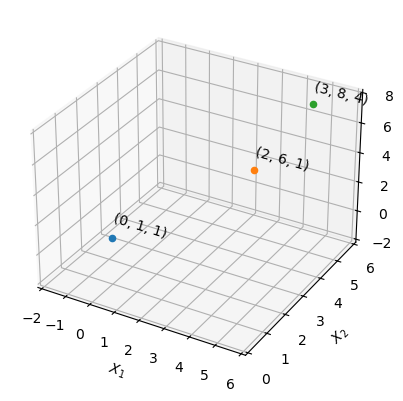

time: 82.7 ms (started: 2024-08-24 14:17:04 +07:00)


In [36]:
ax = plt.figure().add_subplot(projection='3d')

xs = x[:,0]
ys = x[:,1]
zs = y

for x1, x2, _y in zip(xs, ys, zs):
  label = '(%d, %d, %d)' % (x1, x2, _y)
  ax.text(x1, x2, _y, label, 'x')
  ax.scatter(x1, x2, zs=_y)

ax.set_xlim(-2, 6)
ax.set_ylim(0, 6)
ax.set_zlim(-2, 8)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_zlabel('Y')

plt.show()

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, " , ", lin_reg.coef_)

#prediction
y_p = lin_reg.predict(xtest)
print("y predict = ",y_p)

6.999999999999984  ,  [15. -6.]
y predict =  [13.]
time: 1.93 ms (started: 2024-08-24 14:17:04 +07:00)


In [38]:
def cost_function(theta, x, y, N):
  y_hat = x.dot(theta)
  c = (1/(2*N))*np.sum((y_hat-y)**2)
  return c

time: 267 μs (started: 2024-08-24 14:17:04 +07:00)


### Batch GD

In [39]:
def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples
  print("Num of data = ",N)

  # initial theta
  theta =  np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J = cost_function(theta, x, y, N)
  print("First J = ",J)

  # Iterate Loop
  while not converged:

    y_hat = x.dot(theta)
    diff = y_hat - y
    grad = x.T.dot(diff)

    theta = theta - alpha * (1/N) * (grad)

    assert theta.shape == (3,1) #This line makes sure that the shape of theta is still be the same.

    # error
    J2 = cost_function(theta, x, y, N)

    if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True

    J = J2   # update error s
    iter += 1  # update iter

    if iter == max_iter:
        print('       Max iterations exceeded!')
        converged = True

  #print("End converged iter = ",iter)
  return theta

time: 688 μs (started: 2024-08-24 14:17:04 +07:00)


In [40]:
if __name__ == '__main__':

  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)

start main
(3, 3)
(3, 1)
Num of data =  3
Init theta.shape =  (3, 1)
First J =  12.690392085785092
       Converged, iterations:  277924 / 1000000
Theta =  [[ 7.]
 [15.]
 [-6.]]
y predict =  [[13.]]
time: 1.81 s (started: 2024-08-24 14:17:04 +07:00)


### Stochastic GD

In [41]:
def stochastic_gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
  np.random.seed(123)
  converged = False
  iter = 0
  N = x.shape[0] # number of samples
  print("Num of data = ",N)

  # initial theta
  theta = np.random.random((x.shape[1],1))
  print("Init theta.shape = ",theta.shape)

  # total error, J(theta)
  J = cost_function(theta, x, y, N)
  print("First J = ",J)

  rn = np.random.permutation(N)
  x = x[rn]
  y = y[rn]
  
  # Iterate Loop
  while not converged:
    for i in range(N):
      y_hat = x[i].dot(theta)
      diff = y_hat - y[i]
      grad = x[i].reshape(-1,1) * diff

      theta = theta - alpha * grad

      assert theta.shape == (3,1) #This line makes sure that the shape of theta is still be the same.

      # error
      J2 = cost_function(theta, x, y, N)

      if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True
        break

      J = J2   # update error 
    iter += 1  # update iter

    if iter == max_iter:
      print('       Max iterations exceeded!')
      converged = True

  return theta

time: 1.34 ms (started: 2024-08-24 14:17:06 +07:00)


In [42]:
if __name__ == '__main__':
  
  print("start main")
  print(x_b.shape)
  y = y.reshape(-1,1)
  print(y.shape)

  alpha = 0.01 # learning rate
  #Training process
  theta = stochastic_gradient_descent(alpha, x_b, y, ep=0.000000000001, max_iter=1000000)
  print ("Theta = ", theta)

  #predict trainned x
  xtest = np.array([[4,9]])
  xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
  y_p = xtest_b.dot(theta)
  print("y predict = ",y_p)

start main
(3, 3)
(3, 1)
Num of data =  3
Init theta.shape =  (3, 1)
First J =  0.5099319607345218
       Converged, iterations:  96274 / 1000000
Theta =  [[ 7.]
 [15.]
 [-6.]]
y predict =  [[13.]]
time: 2.08 s (started: 2024-08-24 14:17:06 +07:00)


### Mini-batch GD (size = 10)

In [43]:
def mini_batch_gradient_descent(alpha, x, y, batch_size=10, ep=0.001, max_iter=10000):
  converged = False
  iter = 0
  N = x.shape[0] # number of samples

  # initial theta
  theta = np.random.random((x.shape[1],1))

  # total error, J(theta)
  J = cost_function(theta, x, y, N)

  # Iterate Loop
  while not converged:
    for i in range(0, N, batch_size):
      x_batch = x[i:i+batch_size]
      y_batch = y[i:i+batch_size]

      y_hat = x_batch.dot(theta)
      diff = y_hat - y_batch
      grad = x_batch.T.dot(diff)

      theta = theta - alpha * (1.0/batch_size) * grad

      assert theta.shape == (3,1) #This line makes sure that the shape of theta is still be the same.

      # error
      J2 = cost_function(theta, x, y, N)

      if abs(J-J2) <= ep:
        print("       Converged, iterations: ", iter, "/", max_iter)
        converged = True
        break

      J = J2   # update error 
    iter += 1  # update iter

    if iter == max_iter:
      print('       Max iterations exceeded!')
      converged = True

  return theta

time: 639 μs (started: 2024-08-24 14:17:08 +07:00)


In [44]:
if __name__ == '__main__':

    print("start main")
    print(x_b.shape)
    y = y.reshape(-1,1)
    print(y.shape)

    alpha = 0.01 # learning rate
    #Training process
    theta = mini_batch_gradient_descent(alpha, x_b, y, batch_size=10, ep=0.000000000001, max_iter=1000000)
    print ("Theta = ", theta)

    #predict trainned x
    xtest = np.array([[4,9]])
    xtest_b = np.c_[np.ones((xtest.shape[0],1)),xtest]
    y_p = xtest_b.dot(theta)
    print("y predict = ",y_p)

start main
(3, 3)
(3, 1)
       Converged, iterations:  861461 / 1000000
Theta =  [[ 7.  ]
 [14.99]
 [-6.  ]]
y predict =  [[13.]]
time: 6.57 s (started: 2024-08-24 14:17:08 +07:00)


BGD: theta = theta - alpha * (1/N) * (x.T.dot(diff))  
SGD: theta = theta - alpha * (x[i].reshape(-1,1) * diff)  
MBGD: theta = theta - alpha * (1.0/batch_size) * (x_batch.T.dot(diff))  